In [40]:
import pandas as pd

In [41]:
data = pd.read_csv('../data/data.csv')
data.head(10)

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02 00:00:00,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02 00:00:00,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02 00:00:00,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA
5,2014-05-02 00:00:00,490000.0,2.0,1.00,880,6380,1.0,0,0,3,880,0,1938,1994,522 NE 88th St,Seattle,WA 98115,USA
6,2014-05-02 00:00:00,335000.0,2.0,2.00,1350,2560,1.0,0,0,3,1350,0,1976,0,2616 174th Ave NE,Redmond,WA 98052,USA
7,2014-05-02 00:00:00,482000.0,4.0,2.50,2710,35868,2.0,0,0,3,2710,0,1989,0,23762 SE 253rd Pl,Maple Valley,WA 98038,USA
8,2014-05-02 00:00:00,452500.0,3.0,2.50,2430,88426,1.0,0,0,4,1570,860,1985,0,46611-46625 SE 129th St,North Bend,WA 98045,USA
9,2014-05-02 00:00:00,640000.0,4.0,2.00,1520,6200,1.5,0,0,3,1520,0,1945,2010,6811 55th Ave NE,Seattle,WA 98115,USA


In [42]:
# Convert date to years months and days
data["date"] = pd.to_datetime(data["date"]).dt.to_period("D").astype(str)


In [43]:
# How many days distinct days we have
daily_counts = data.groupby("date").size().reset_index(name="count")
daily_counts.head()


,date,count
0,2014-05-02,67
1,2014-05-03,4
2,2014-05-04,5
3,2014-05-05,84
4,2014-05-06,83


In [44]:
from sklearn.preprocessing import LabelEncoder

# TODO - Discuss alternatives to label encoding. Encode based on feature not the entire data frame
data_copy = data.head().copy()

# Initialize label encoder
le = LabelEncoder()

for col in data_copy.columns:
    if data_copy[col].dtype == 'object':
        data_copy[col] = le.fit_transform(data_copy[col].astype(str))

correlation_matrix = data_copy.corr()
correlation_matrix.head()


,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
date,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
price,NaN,1.000000,0.915514,0.547160,0.964594,-0.122631,0.841018,NaN,0.994662,0.823425,0.905033,-0.085364,-0.896851,-0.380540,0.098152,0.325039,0.325039,NaN
bedrooms,NaN,0.915514,1.000000,0.701561,0.876443,0.022162,0.687500,NaN,0.875000,0.790569,0.753084,0.067786,-0.671430,-0.103721,0.353553,0.353553,0.353553,NaN
bathrooms,NaN,0.547160,0.701561,1.000000,0.685175,0.246514,0.033408,NaN,0.467707,0.845154,0.319320,0.618549,-0.153204,-0.330873,0.850420,-0.377964,-0.377964,NaN
sqft_living,NaN,0.964594,0.876443,0.685175,1.000000,0.014162,0.683394,NaN,0.951088,0.940131,0.879400,0.035045,-0.808276,-0.560060,0.231151,0.072803,0.072803,NaN


In [45]:
import seaborn as sns
import matplotlib.pyplot as plt

<Axes: xlabel='price', ylabel='bedrooms'>

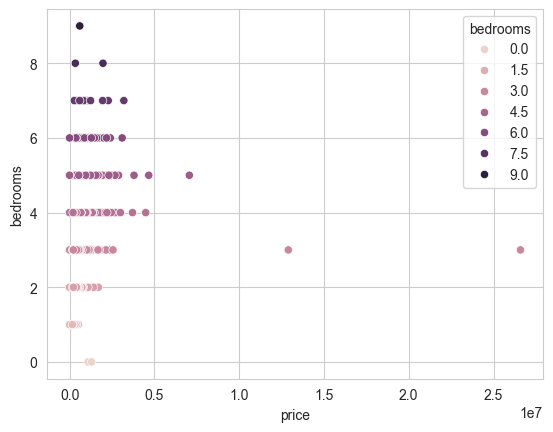

In [46]:
sns.scatterplot(x="price", y="bedrooms", data=data, hue="bedrooms")

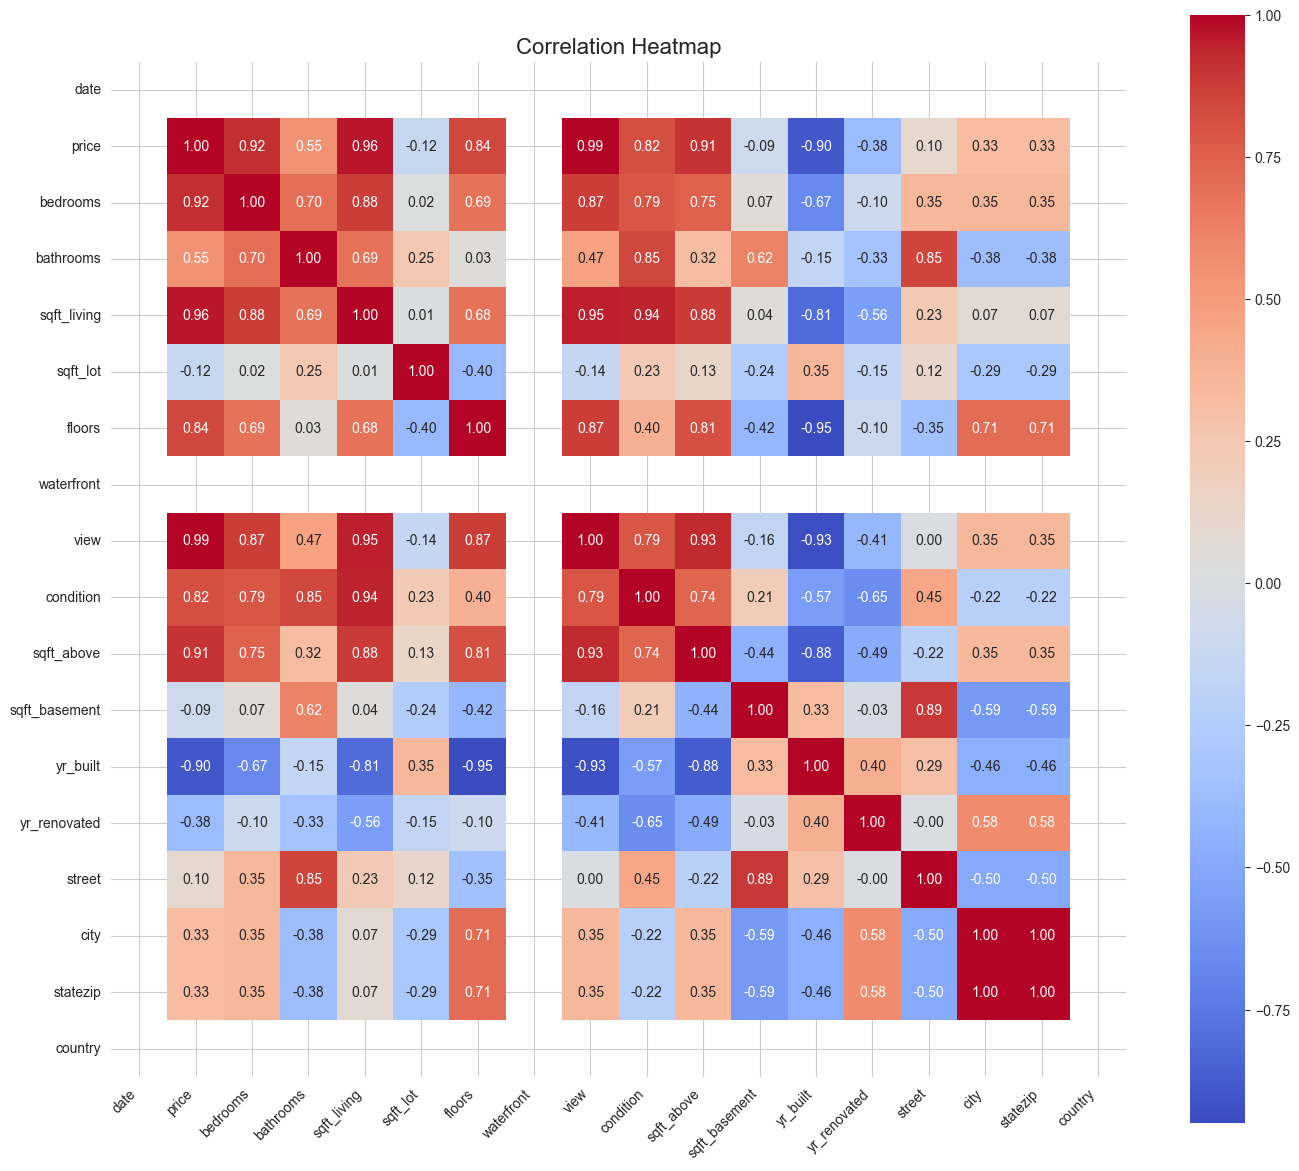

In [47]:
plt.figure(figsize=(14, 12))  # Increase width and height
sns.heatmap(data=correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", square=True)

plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels
plt.yticks(rotation=0)  # Keep y-axis labels horizontal
plt.title("Correlation Heatmap", fontsize=16)
plt.tight_layout()
plt.show()


In [71]:
# Feature selection
corr_with_price = correlation_matrix["price"].abs().sort_values(ascending=False)
top_features = corr_with_price.index[1:5]   # skip “price” itself, take the next 5
print("Top features: " + top_features)

Index(['Top features: view', 'Top features: sqft_living',
       'Top features: bedrooms', 'Top features: sqft_above'],
      dtype='object')


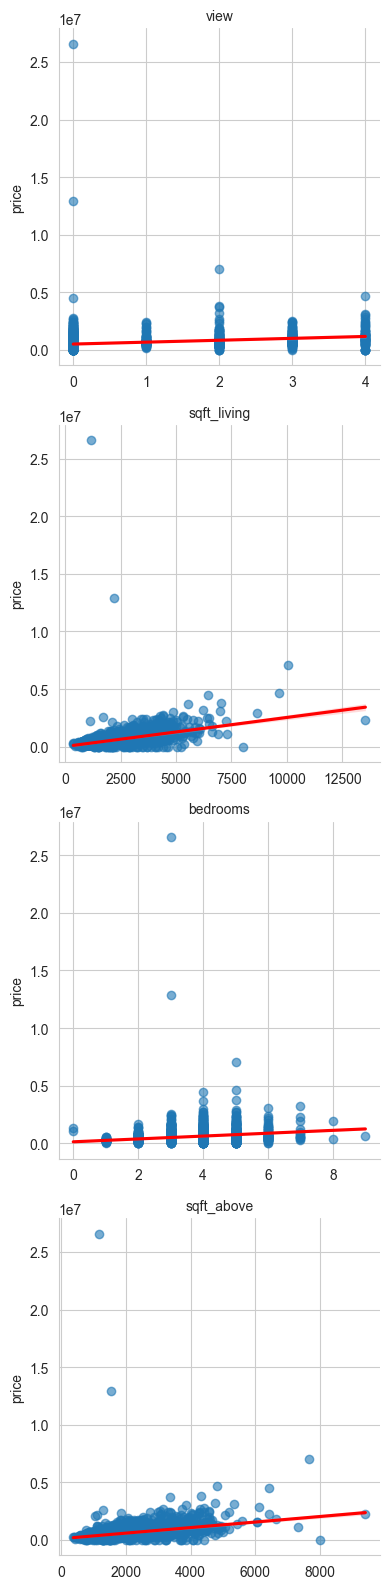

In [76]:
import matplotlib.pyplot as plt
import seaborn as sns

melted = data.melt(
    id_vars="price",
    value_vars=top_features,
    var_name="feature",
    value_name="value"
)

g = sns.FacetGrid(
    melted,
    col="feature",
    col_wrap=1,
    height=4,
    sharex=False
)

g.map(
    sns.regplot,
    "value", "price",
    scatter_kws={"alpha":0.6},
    line_kws={"color":"red"}
)

g.set_axis_labels("", "price")
g.set_titles("{col_name}")

# Tidy up spacing
g.fig.tight_layout(w_pad=1.0, h_pad=1.2)
plt.show()
